# Experiment Analysis

Mean-focused plots + routing counts + rankings.


In [11]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

plt.style.use("seaborn-v0_8-pastel")

RESULTS_CSV = "experiment_results.csv"

results = pd.read_csv(RESULTS_CSV)
results.head()


,question,question_id,question_type,architecture,time_ms,tokens,keyword_precision_k,keyword_recall_k,semantic_precision_k,semantic_recall_k,grounding_score,error,routing_pipeline,routing_profile
0,What is the largest religious group in Canada?,321,NaN,vanilla,9894.702084,6.0,1.0,0.019011,0.0,0.000000,1.000000,NaN,NaN,NaN
1,Why do wolves howl?,675,NaN,vanilla,15457.610125,52.0,1.0,0.045455,0.6,0.150000,0.830189,NaN,NaN,NaN
2,What is the largest religious group in Canada?,321,NaN,routing,17221.976458,1.0,1.0,0.019011,0.0,0.000000,1.000000,NaN,vanilla,balanced_openai
3,What is the largest religious group in Canada?,321,NaN,query_decomposition,32804.143625,45.0,1.0,0.019011,0.2,0.333333,0.600000,NaN,NaN,NaN
4,What is the largest religious group in Canada?,321,NaN,marag,44169.625750,30.0,1.0,0.019011,0.4,0.666667,0.962963,NaN,NaN,NaN


## Routing selection counts


In [12]:
routing_counts = (
    results.loc[results['architecture'] == 'routing', 'routing_pipeline']
    .value_counts(dropna=True)
    .sort_values(ascending=False)
)
routing_counts


routing_pipeline
vanilla                18
query_decomposition     2
Name: count, dtype: int64

## Summary table (mean/median/std)


In [13]:
metric_cols = [
    'time_ms',
    'tokens',
    'keyword_precision_k',
    'keyword_recall_k',
    'semantic_precision_k',
    'semantic_recall_k',
    'grounding_score',
]

summary = (
    results.groupby('architecture')[metric_cols]
    .agg(['mean', 'median', 'std'])
    .sort_values(('grounding_score', 'mean'), ascending=False)
)
summary


time_ms                             tokens         \
                               mean        median           std   mean median   
architecture                                                                    
vanilla                 6624.397725   5680.865646   3405.006047  26.15   21.5   
marag                  41074.510619  41242.593917  15835.047520  54.75   31.5   
active_retrieval       26868.645971  23061.921896  13701.484087  24.65   25.0   
self_reflective        60967.389638  63345.453979  19452.211325  98.90   79.0   
routing                 5516.160685   4618.392146   4134.821782  20.85   21.5   
madam_rag              43566.669819  37165.528749  21303.356724  34.50   29.0   
query_decomposition    26217.937460  25610.622229   8297.535776  43.60   35.5   
chain_of_verification  60099.783990  59112.435042  20466.340108  68.15   65.5   

                                 keyword_precision_k                   \
                             std                mean median       std   
architecture                                                            
vanilla                20.358045                0.90    1.0  0.247088   
marag                  48.013019                0.90    1.0  0.247088   
active_retrieval       17.445479                0.90    1.0  0.247088   
self_reflective        59.891041                0.90    1.0  0.247088   
routing                19.164866                0.84    1.0  0.340897   
madam_rag              28.496537                0.90    1.0  0.247088   
query_decomposition    32.891208                0.77    1.0  0.385391   
chain_of_verification  27.444250                0.90    1.0  0.247088   

                      keyword_recall_k  ...           semantic_precision_k  \
                                  mean  ...       std                 mean   
architecture                            ...                                  
vanilla                       0.090853  ...  0.215675                 0.31   
marag                         0.090853  ...  0.215675                 0.41   
active_retrieval              0.090853  ...  0.215675                 0.31   
self_reflective               0.090853  ...  0.215675                 0.52   
routing                       0.082665  ...  0.217048                 0.24   
madam_rag                     0.090853  ...  0.215675                 0.36   
query_decomposition           0.030125  ...  0.023478                 0.21   
chain_of_verification         0.090853  ...  0.215675                 0.25   

                                       semantic_recall_k                      \
                      median       std              mean    median       std   
architecture                                                                   
vanilla                  0.2  0.278908          0.468077  0.291667  0.436200   
marag                    0.3  0.307622          0.583545  0.571429  0.365252   
active_retrieval         0.2  0.278908          0.496515  0.450000  0.404653   
self_reflective          0.5  0.339659          0.476412  0.392857  0.337250   
routing                  0.2  0.256289          0.392178  0.261364  0.405544   
madam_rag                0.2  0.334664          0.484064  0.416667  0.411351   
query_decomposition      0.2  0.246875          0.265419  0.162281  0.309811   
chain_of_verification    0.2  0.223607          0.536538  0.500000  0.428598   

                      grounding_score                      
                                 mean    median       std  
architecture                                               
vanilla                      0.896844  0.928205  0.140346  
marag                        0.879664  0.888462  0.098802  
active_retrieval             0.860575  0.899038  0.224031  
self_reflective              0.832671  0.830846  0.105252  
routing                      0.781407  0.870833  0.305356  
madam_rag                    0.712554  0.728022  0.125896  
query_decomposition          0.666357  0.736842  0.1

## Mean latency and tokens


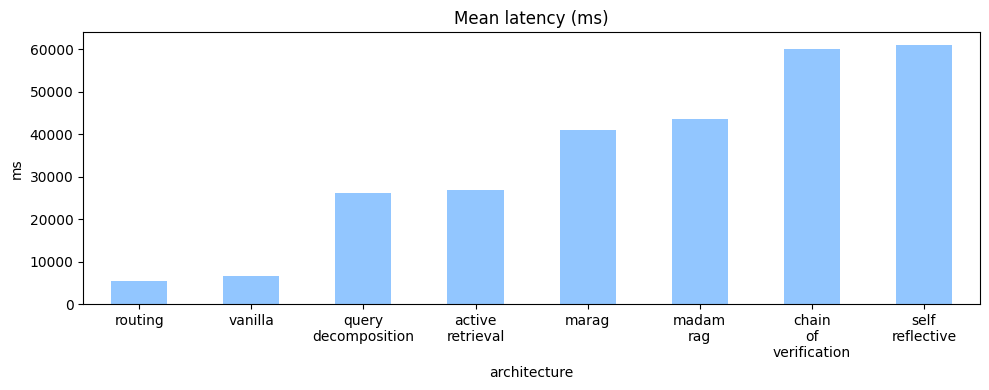

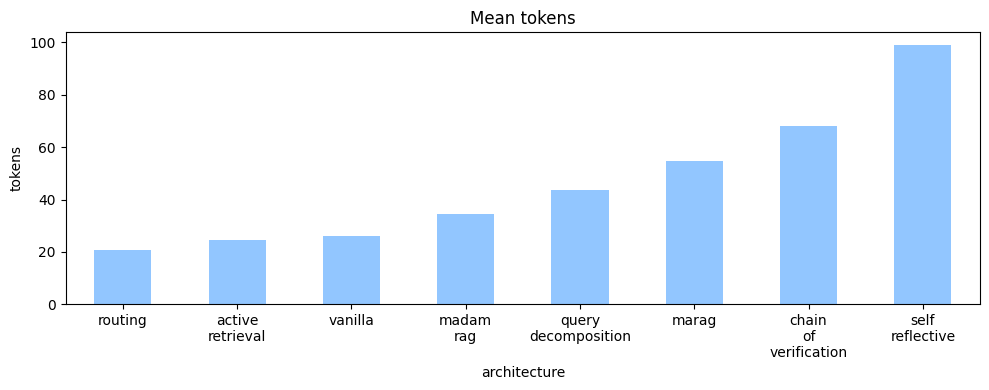

In [14]:
means = results.groupby('architecture')[['time_ms', 'tokens']].mean()

time_series = means['time_ms'].sort_values(ascending=True)
ax = time_series.plot(kind='bar', figsize=(10, 4), title='Mean latency (ms)')
ax.set_ylabel('ms')
ax.set_xticklabels([name.replace('_', '\n') for name in time_series.index], rotation=0)
plt.tight_layout()
plt.show()

token_series = means['tokens'].sort_values(ascending=True)
ax = token_series.plot(kind='bar', figsize=(10, 4), title='Mean tokens')
ax.set_ylabel('tokens')
ax.set_xticklabels([name.replace('_', '\n') for name in token_series.index], rotation=0)
plt.tight_layout()
plt.show()


## Mean scores (each separately)


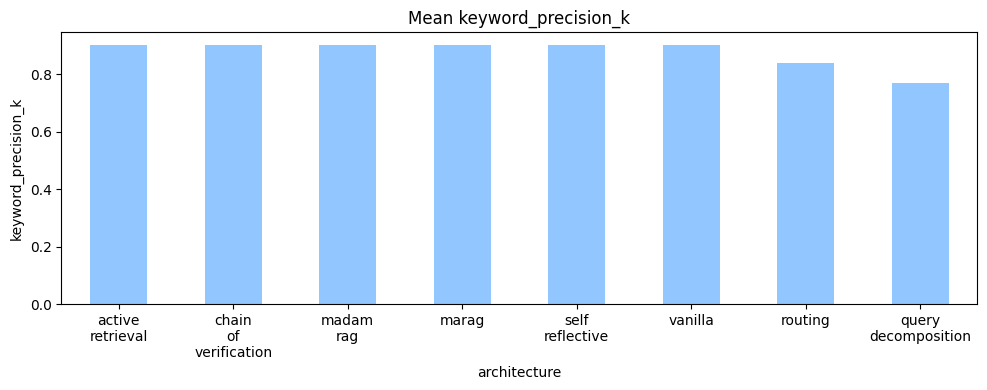

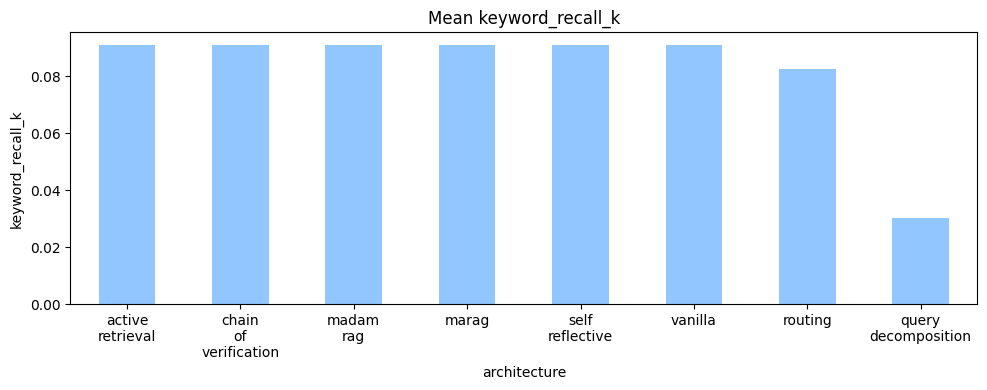

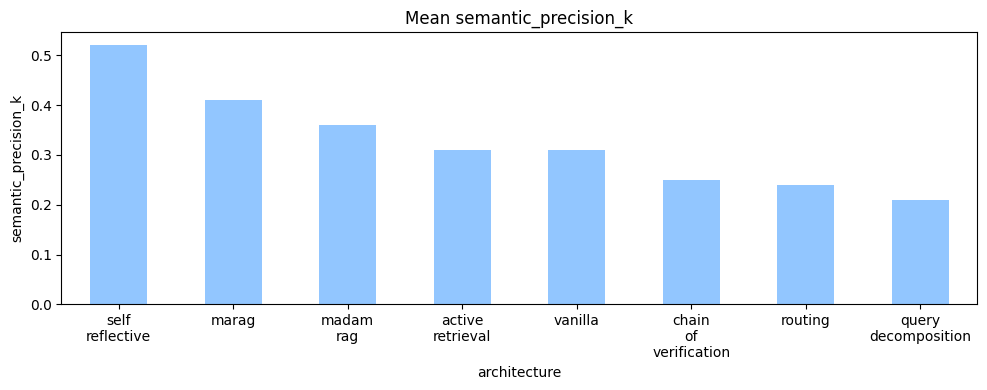

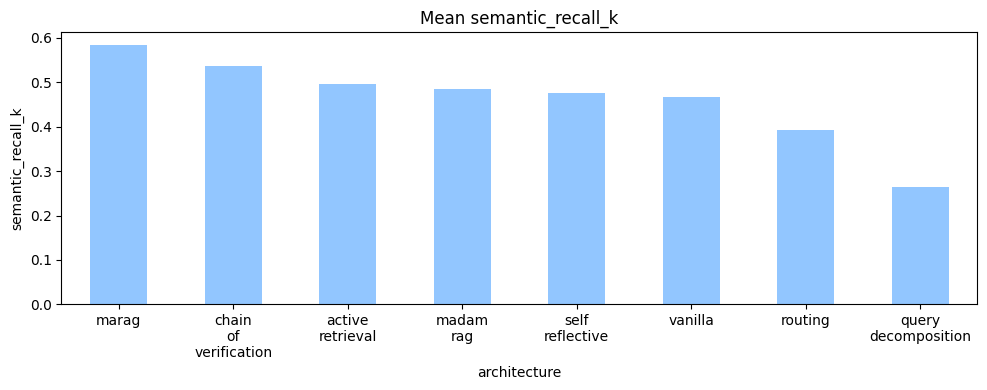

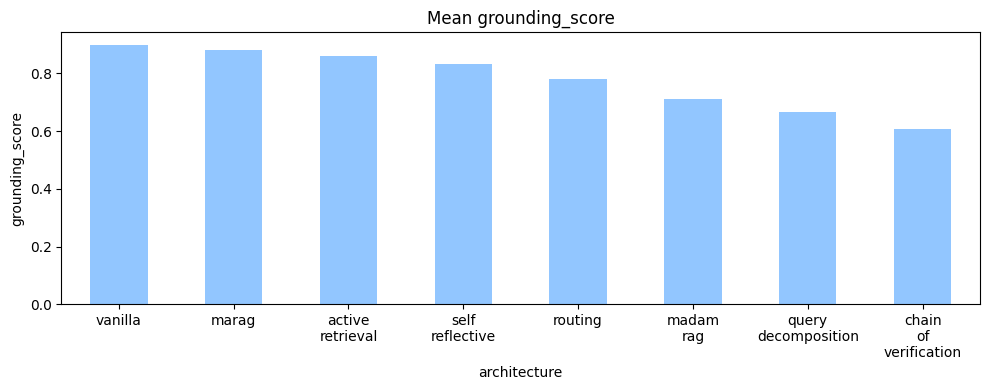

In [15]:
score_cols = [
    'keyword_precision_k',
    'keyword_recall_k',
    'semantic_precision_k',
    'semantic_recall_k',
    'grounding_score',
]

means_scores = results.groupby('architecture')[score_cols].mean()

for col in score_cols:
    series = means_scores[col].sort_values(ascending=False)
    ax = series.plot(kind='bar', figsize=(10, 4), title=f'Mean {col}')
    ax.set_ylabel(col)
    ax.set_xticklabels([name.replace('_', '\n') for name in series.index], rotation=0)
    plt.tight_layout()
    plt.show()


## Perfect 1.0 counts (precision/recall)


In [16]:
total_questions = results['question'].nunique()

perfect_counts = (
    results.groupby('architecture')[
        ['semantic_precision_k', 'semantic_recall_k']
    ]
    .agg(lambda s: (s == 1.0).sum())
    .rename(columns={
        'semantic_precision_k': 'semantic_precision_1',
        'semantic_recall_k': 'semantic_recall_1',
    })
)

perfect_counts['questions'] = total_questions
perfect_counts.sort_values('semantic_precision_1', ascending=False)


,semantic_precision_1,semantic_recall_1,questions
architecture,,,
self_reflective,3,4,20
madam_rag,2,6,20
marag,1,7,20
active_retrieval,0,6,20
chain_of_verification,0,8,20
query_decomposition,0,1,20
routing,0,4,20
vanilla,0,7,20


## Wrong 0.0 counts (precision/recall)


In [21]:
total_questions = results['question'].nunique()

perfect_counts = (
    results.groupby('architecture')[
        ['semantic_precision_k', 'semantic_recall_k']
    ]
    .agg(lambda s: (s == 0.0).sum())
    .rename(columns={
        'semantic_precision_k': 'semantic_precision_0',
        'semantic_recall_k': 'semantic_recall_0',
    })
)

perfect_counts['questions'] = total_questions
perfect_counts.sort_values('semantic_precision_0', ascending=False)


,semantic_precision_0,semantic_recall_0,questions
architecture,,,
query_decomposition,8,8,20
routing,8,8,20
vanilla,6,6,20
active_retrieval,5,5,20
chain_of_verification,5,5,20
madam_rag,5,5,20
marag,2,2,20
self_reflective,2,2,20


## Unique wins (composite quality)

Composite = semantic_precision_k + semantic_recall_k + grounding_score.
Unique win = strictly highest composite for a question.


In [18]:
results['quality_score'] = results['semantic_precision_k'] + results['semantic_recall_k'] + results['grounding_score']

winner_counts = {arch: 0 for arch in results['architecture'].unique()}
for _, group in results.groupby('question'):
    best = group['quality_score'].max()
    winners = group[group['quality_score'] == best]['architecture']
    if len(winners) == 1:
        winner_counts[winners.iloc[0]] += 1

winner_series = pd.Series(winner_counts).sort_values(ascending=False)
winner_series


marag                    5
self_reflective          5
vanilla                  4
active_retrieval         2
chain_of_verification    1
routing                  0
query_decomposition      0
madam_rag                0
dtype: int64

## Per-question ranking and global rank by product of places

Ranking per question is based on semantic_precision_k + semantic_recall_k + grounding_score.
Ties (ex aequo) share the same place (method='min').
Uses log-sum to avoid overflow; lower is better.


In [19]:
results['quality_score'] = results['semantic_precision_k'] + results['semantic_recall_k'] + results['grounding_score']

rank_rows = []
for q, group in results.groupby('question'):
    ranks = group['quality_score'].rank(ascending=False, method='min')
    for (_, row), place in zip(group.iterrows(), ranks):
        rank_rows.append({
            'question': q,
            'architecture': row['architecture'],
            'quality_score': row['quality_score'],
            'place': int(place),
        })

rank_df = pd.DataFrame(rank_rows)
rank_df.head(8).sort_values(['question', 'place']).reset_index(drop=True)

,question,architecture,quality_score,place
0,Did Abraham Lincoln live in the Frontier?,self_reflective,1.978571,1
1,Did Abraham Lincoln live in the Frontier?,routing,0.900000,2
2,Did Abraham Lincoln live in the Frontier?,vanilla,0.866667,3
3,Did Abraham Lincoln live in the Frontier?,active_retrieval,0.818182,4
4,Did Abraham Lincoln live in the Frontier?,marag,0.791667,5
5,Did Abraham Lincoln live in the Frontier?,madam_rag,0.611111,6
6,Did Abraham Lincoln live in the Frontier?,chain_of_verification,0.425532,7
7,Did Abraham Lincoln live in the Frontier?,query_decomposition,0.400000,8


In [20]:
place_logs = rank_df.groupby('architecture')['place'].agg(lambda s: np.log(s).sum())
product_rank = place_logs.sort_values().rename('place_product_logsum')
product_rank

architecture
vanilla                  17.945994
self_reflective          18.505610
active_retrieval         20.649590
marag                    20.852531
routing                  24.918288
madam_rag                30.666406
chain_of_verification    31.793606
query_decomposition      36.884528
Name: place_product_logsum, dtype: float64

## Exemplery answers

In [24]:
import json

data = json.load(open("experiment_logs.json", "r"))

In [25]:
exemplery_results = []

In [28]:
for record in data:
    if record['question_id'] == '321':
        exemplery_results.append({
            'question': record['question'],
            'architecture': record['architecture'],
            'answer': record['answer'],
            'reference_answer': record['reference_answer'],
        })

exemplery_results = pd.DataFrame(exemplery_results)

In [30]:
print(f"Question: {exemplery_results.loc[0, 'question']}")
print(f"Reference Answer: {exemplery_results.loc[0, 'reference_answer']}")
for idx, row in exemplery_results.iterrows():
    print(f"\nArchitecture: {row['architecture']}\nAnswer: {row['answer']}")


Question: What is the largest religious group in Canada?
Reference Answer: According to 2001 census, 77.1% of Canadians identified as being Christians; of this, Catholics make up the largest group (43.6% of Canadians). The largest Protestant denomination is the United Church of Canada; about 16.5% of Canadians declare no religious affiliation, and the remaining 6.3% were affiliated with religions other than Christianity, of which the largest is Islam numbering 1.9%, followed by Judaism: 1.1%. 

Architecture: vanilla
Answer: Christians (Catholics are the largest denomination).

Architecture: routing
Answer: Catholics.

Architecture: query_decomposition
Answer: The largest religious group in Canada is Christianity. About 77.1% identify as Christian, and within Christianity, Catholics are the largest denomination, comprising 43.6% of Canadians. (Step 2 supports Christianity as the largest group; Step 1 identifies Catholics as the largest subgroup within Christianity at 43.6%.)

Architectu